##**04. 모델 세부 설정**

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


###04-1. 초기값 설정

레이어의 초기화 방법을 다르게 설정할 수 있음. Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정됨.

In [2]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [3]:
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer = he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


###04-2. 규제(REgularization)

모델의 과대적합을 해소하기 위해 L1,L2 규제를 적용.

텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있다.

In [4]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


###04-3. 드롭아웃(Dropout)

딥러닝 모델의 가장 큰 난제는 과대적합 문제이다. 따라서 훈련할 때 만나지 못한 새로운 데이터에 대해서는 좋지 않는 예측력을 보일 때가 많다.

드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보이는 것으로 알려짐.
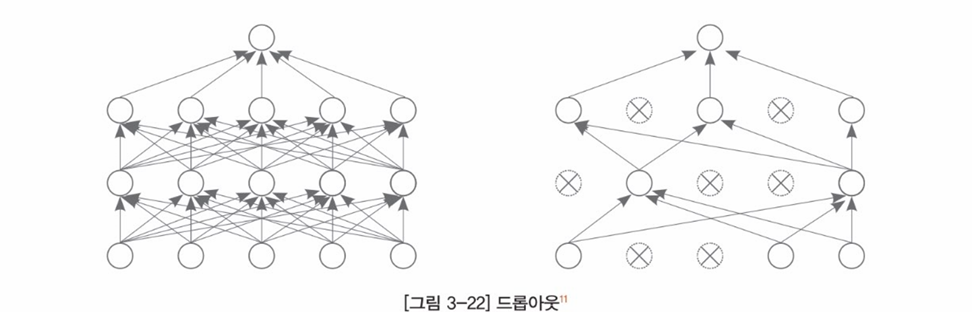

In [6]:
tf.keras.layers.Dropout(0.25)

<Dropout name=dropout, built=False>

###04-4. 배치 정규화(Batch Normalization)
배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음.

In [7]:
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28,28)),
          tf.keras.layers.Dense(64),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation('relu'),
          tf.keras.layers.Dense(32),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation('relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

###04-5. 활성화 함수


In [9]:
tf.keras.layers.LeakyReLU()
tf.keras.layers.LeakyReLU(alpha=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<LeakyReLU name=leaky_re_lu_1, built=False>

In [10]:
model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(alpha=0.2),
          tf.keras.layers.Dense(32),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(alpha=0.2),
          tf.keras.layers.Dense(10,activation='softmax')
])
model_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 - model_a : Dense 레이어 + ReLU 활성화함수
 - model_b : Dense 레이어 + 배치 정규화
 - model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0,2) 활성화함수

In [11]:
model_a.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_b.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_c.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history_a = model_a.fit(x_train, y_train, validation_data = (x_test, y_test),epochs=10)
history_b = model_b.fit(x_train, y_train, validation_data = (x_test, y_test),epochs=10)
history_c = model_c.fit(x_train, y_train, validation_data = (x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8404 - loss: 0.5272 - val_accuracy: 0.9537 - val_loss: 0.1580
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9567 - loss: 0.1472 - val_accuracy: 0.9585 - val_loss: 0.1429
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9700 - loss: 0.0984 - val_accuracy: 0.9656 - val_loss: 0.1119
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9759 - loss: 0.0763 - val_accuracy: 0.9676 - val_loss: 0.1015
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0638 - val_accuracy: 0.9683 - val_loss: 0.1058
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9707 - val_loss: 0.1029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9857 - loss: 0.0433 - val_accuracy: 0.9690 - val_loss: 0.1037
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0363 

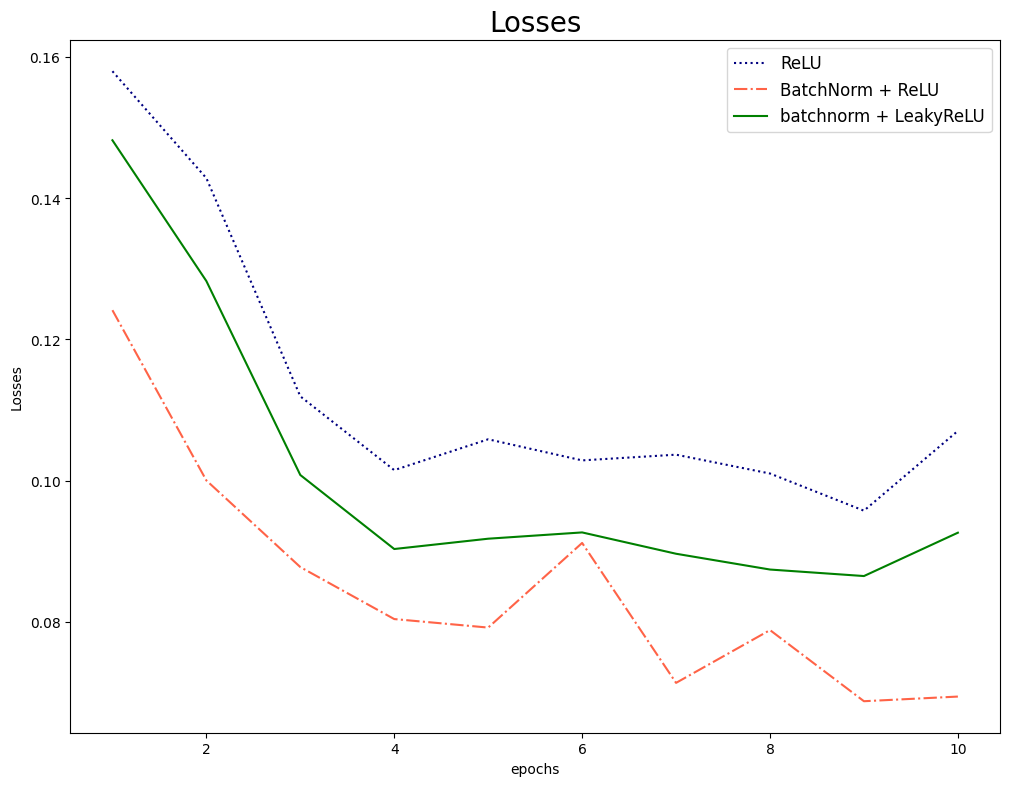

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color = 'navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color = 'tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color = 'green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

##**06. 모델 저장 및 불러오기**

###06-1. 모델을 파일로 저장
훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있음.
save() 메소드를 사용.

In [13]:
model_c.save('h5-model.h5')

###06-2. 저장된 모델 복원

In [14]:
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,036 (207.18 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
loss,acc = h5_model.evaluate(x_test,y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

h5 model] loss:0.09260, acc:0.97290


In [16]:
model_c.save('saved-model.keras')

In [17]:
saved_model = tf.keras.models.load_model('saved-model.keras')
saved_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,878 (413.59 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 52,844 (206.43 KB)

In [18]:
loss,acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss:{loss:.5f}, acc:{acc:.5f}')

h5 model] loss:0.09260, acc:0.97290
saved_model] loss:0.09260, acc:0.97290


##**07. 복잡한 모델 생성**
###07-1. 함수형 API
함수형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다.
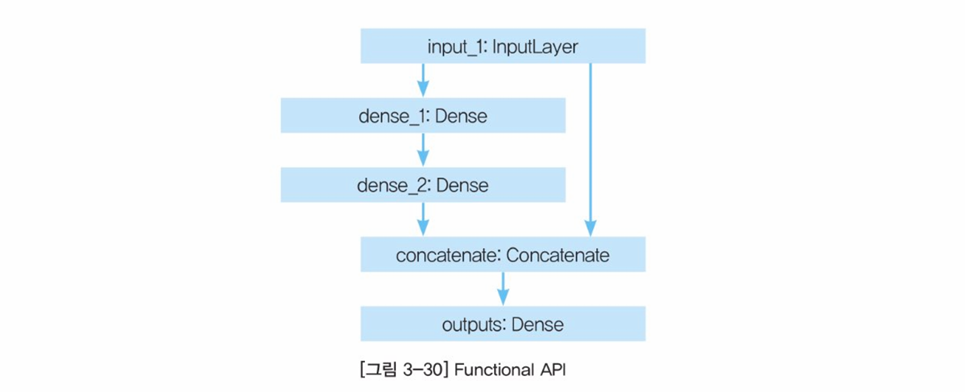

In [19]:
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [20]:
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')
func_model.summary()

Model: "FunctionalModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

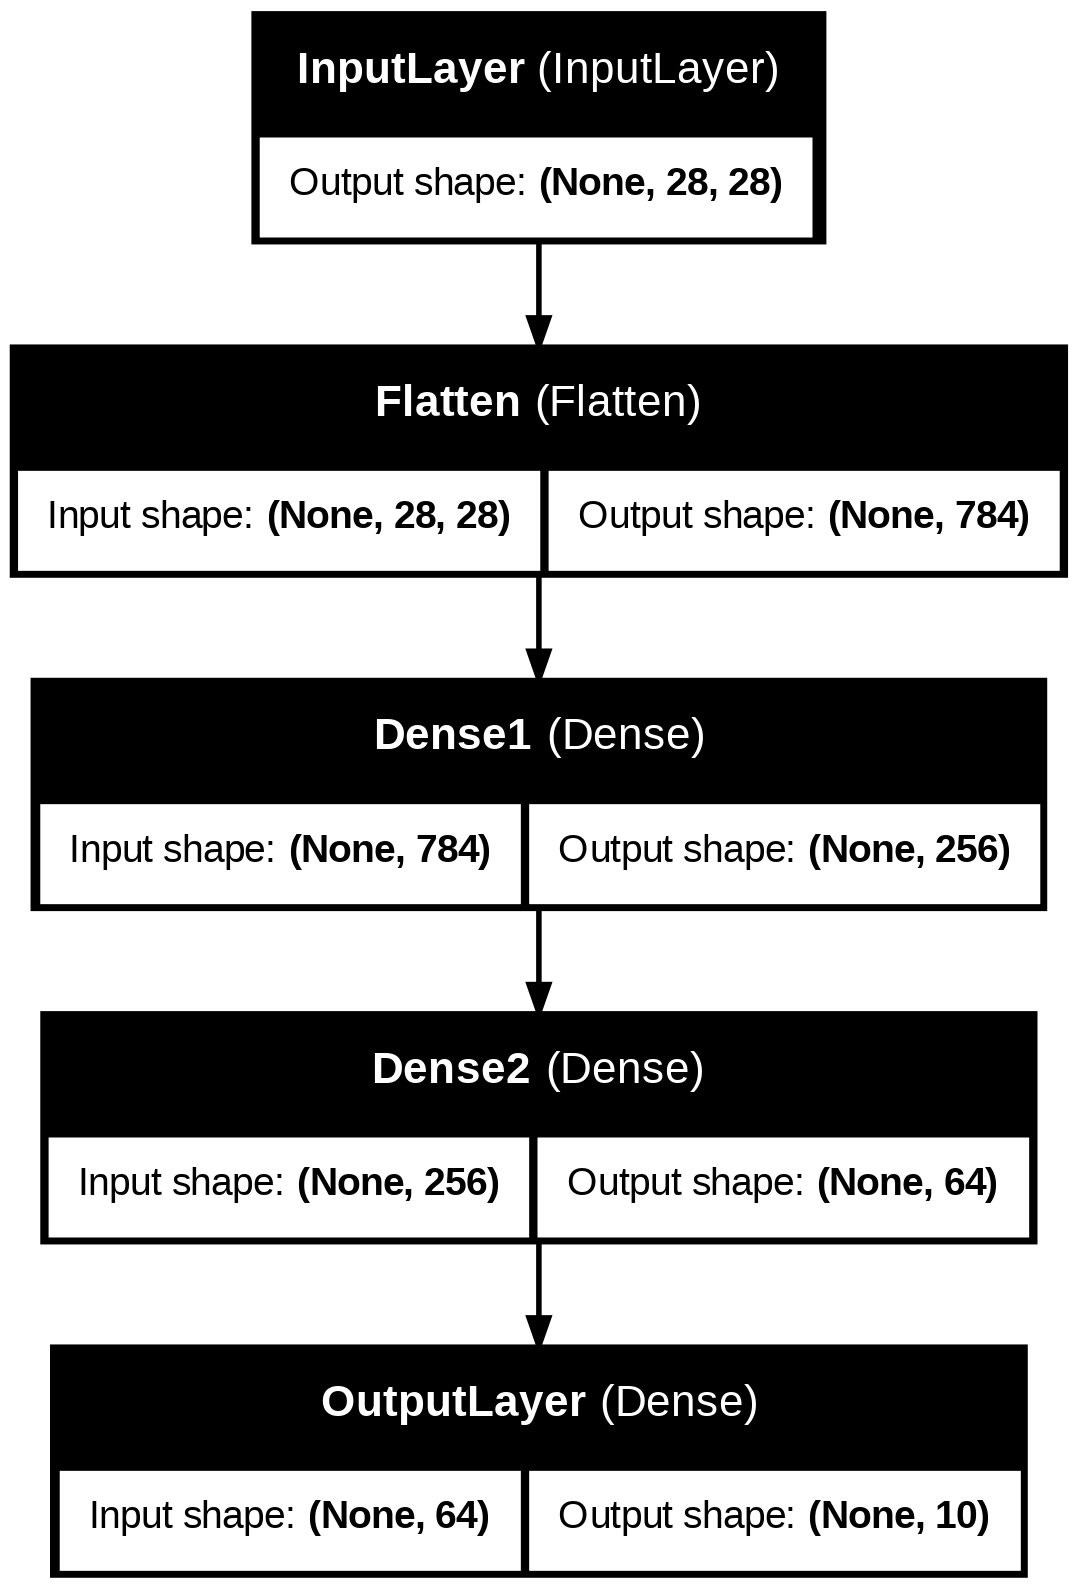

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file = 'model.png')

In [22]:
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
func_model.fit(x_train, y_train, epochs=3)
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model]loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8956 - loss: 0.3637
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9729 - loss: 0.0877
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0539
Functional Model]loss:0.08075, acc:0.97620


###07-2. 모델 서브클래싱
텐서플로 케라스는 Model 클래스를 제공하고 이를 기반으로 딥러닝 모델을 구현.
이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만듦.
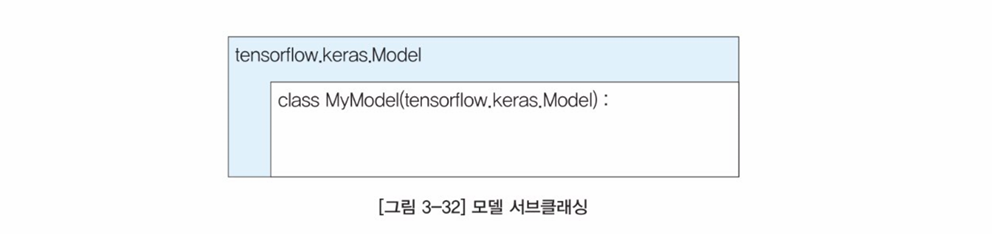

In [23]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [24]:
mymodel = MyModel()
mymodel._name = 'subclass_model'
mymodel(tf.keras.layers.Input(shape=(28,28)))
mymodel.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=3)
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss:{loss:.5f}, acc:.{acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8897 - loss: 0.3766
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9712 - loss: 0.0922
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9815 - loss: 0.0578
Subclassing Model] loss:0.07857, acc:.0.97650


###07-3. 서브클래싱 모델 파라미터를 활용한 생성


In [26]:
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [27]:
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:1331: UserWarning: Layer 'my_model_1' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Cannot convert '(256, 64.0)' to a shape. Found invalid entry '64.0' of type '<class 'float'>'. ''
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'my_model_1', however the layer does not have a `build()` method implemented and i

ValueError: Exception encountered when calling MyModel.call().

[1mCould not automatically infer the output shape / dtype of 'my_model_1' (of type MyModel). Either the `MyModel.call()` method is incorrect, or you need to implement the `MyModel.compute_output_spec() / compute_output_shape()` method. Error encountered:

Cannot convert '(256, 64.0)' to a shape. Found invalid entry '64.0' of type '<class 'float'>'. [0m

Arguments received by MyModel.call():
  • args=('<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=None, name=keras_tensor_102>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

mymodel.fit(x_train, y_train, epochs=3)

loss,  acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model w.parameters] loss : {loss:.5f}.acc : {acc:.5f}")